# Deep Learning

- 해당 챕터는 확인이 필요한 부분에 대해서만 정리

### 2. 인공 신경망(Aritificial Neural Network)

##### 2-1. 피드 포워드 신경망(Feed-Forward Neural Network, FFNN)

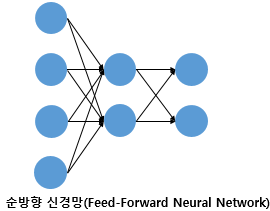

- 위 그림의 MLP과 같이 오직 입력층에서 출력층 방향으로 연산이 전개되는 신경망을 피드 포워드 신경망

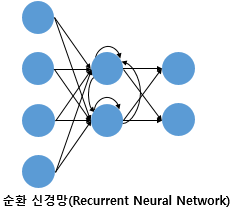

- 위 그림은 FFNN에 속하지 않는 RNN 신경망

- 이 신경망은 은닉층의 출력값을 출력층으로도 보내지만, 동시에 은닉층의 출력값이 다시 은닉층의 입력으로 사용

##### 2-2. 전결합층(Fully-connected layer, FC, Dense layer)

- 은닉층과 출력층에 있는 모든 뉴런은 바로 이전 층의 모든 뉴런과 연결되어 있음

##### 2-3. 활성화 함수(Activaiton Function)

- 활성화 함수의 특징

    - 비선형 함수

        - 활성화 함수가 선형일 경우 은닉층을 추가하더라도 선형식으로 표현이 가능하기 때문에 1회 추가한 것과 차이가 없음

        - 그러므로 비선형 함수(step function 등)를 사용함

        - 하지만 선형 함수 층을 사용하지 않는다는 것은 아님

        - 선형 층을 추가하면 학습 가능한 가중치가 새로 생긴다는 의미가 있으며, 임베딩 층도 활성화 함수가 없음

- sigmoid, hyperbolic tangent function에서 기울기 소실(vanishing gradient) 문제 발생

- 이를 해결하기 위해 ReLU 함수를 사용하나 max(0, x)에서 입력값이 음수면 기울기가 0이 되면서 이 뉴런은 다시 회생하는 것이 어려움

- 이를 죽은 렐루(dying ReLU)라고 함

- 죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장 대표적으로 Leaky ReLU = max(ax, x)

- Leaky ReLU는 입력값이 음수일 경우  0이 아니라 0.001과 같은 매우 작은 수를 반환

- 이를 통해 입력값이 음수라도 기울기가 0이 되지 않으면서 ReLU는 죽지 않음

- 은닉층에서는 ReLU함수나 변형 함수들을 사용하는 것이 일반적인 반면 출력층에서는 소프트맥스 함수가 주로 사용

- 시그모이드 함수가 이진 분류 문제에 사용된다면 소프트맥스 함수는 세 가지 이상의 다중 클래스 분류 문제에 주로 사용

### 3. 행렬곱으로 이해하는 신경망

##### 3-3. 행렬곱으로 병렬 연산 이해

- 행렬곱으로 변경하면 병렬 연산 가능

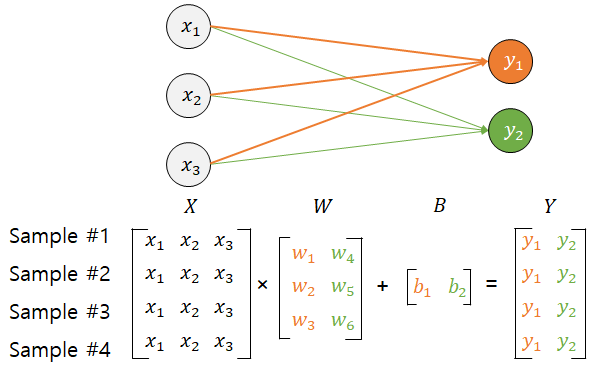

- 여기서 혼동하지 말아야 할 것은 인공 신경망의 4개의 샘플을 동시에 처리하고 있지만, 학습 가능한 매개변수의 수는 여전히 8개

- 다수의 샘플을 동시에 처리하는 것을 '배치 연산'

- 구현

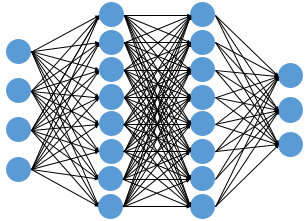

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(8, input_dim=4, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 40        
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. 딥 러닝의 학습 방법

##### 4-1. 손실 함수(Loss function)

- 손실 함수는 실제값과 예측값의 차이를 수치화해주는 함수

- 회귀에서는 MSE, 분류 문제에서는 Cross-Entropy를 주로 손실 함수로 사용

- 이진 크로스 엔트로피(Binary Cross-Entropy)

    - 출력층에서 시그모이드 함수를 사용하는 이진 분류의 경우 binary_crossentropy 사용

- 카테고리칼 크로스 엔트로피(Categorical Cross-Entropy)

    - 범주형 교차 엔트로피

##### 4-2. 배치 크기(batch size)에 따른 경사 하강법

- 손실 함수의 값을 줄여나가면서 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 달라짐

- 여기서 배치(batch)라는 개념에 대한 이해가 필요

- batch는 가중치 등의 매개 변수의 값을 조정하기 위해 사용하는 데이터의 양

- 전체 데이터를 가지고 매개 변수의 값을 조정할 수도 있고, 정해준 양의 데이터만 가지고도 매개 변수의 값을 조정할 수 있음

- 배치 경사 하강법(Batch Gradient Descent)

    - 가장 기본적인 경사 하강법으로 옵티마이저로 오차를 구할 때 전체 데이터를 고려

    - 전체 데이터로 매개 변수를 업데이트하기 때문에 1epoch 당 1번 매개 변수 업데이트

    - 전체 데이터를 고려해서 학습하므로 한 번의 매개 변수 업데이트에 시간이 오래 걸리며, 메모리를 크게 요구한다는 단점이 있음

- 배치 크기가 1인 확률적 경사 하강법(Stochastic Gradient Descent, SGD)

    - 배치 경사 하강법이 전체 데이터에 대해서 계산을 하다보니 시간이 너무 오래 걸린다는 단점이 있음

    - 배치 크기가 1인 확률적 경사 하강법은 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산

    - 더 적은 데이터를 사용하므로 더 빠르게 계산할 수 있음

    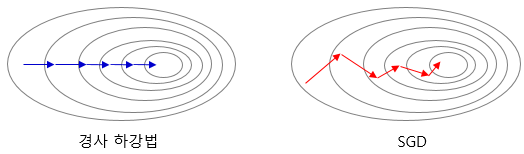

    - 확률적 경사 하강법은 매개 변수의 변경폭이 불안정하고, 때로는 경사 하강법보다 정확도가 낮을 수도 있지만

    - 자원이 적은 컴퓨터에서도 쉽게 사용가능하다는 장점

- 미니 배치 경사 하강법(Mini-Batch Gradient Descent)

    - 배치 크기를 지정하여 해당 데이터 개수만큼에 대해서 계산하여 매개변수의 값을 조정하는 경사 하강법

    - 배치 경사 하강법보다 빠르며 SGD보다 안정적이라는 장점이 있어 가장 많이 사용되는 경사 하강법

##### 4-3. 옵티마이저(Optimizer)

- 모멘텀(Momentum)

    - 관성이라는 물리학의 법칙을 응용한 방법

    - 경사 하강법에서 계산된 접선의 기울기에 한 시점 전의 접선의 기울기값을 일정한 비율만큼 반영

    - 이렇게 하면 local minimum에 빠지는 것을 관성으로 넘어서서 global minimum에 도달할 수 있도록 함

    - tf.keras.optimizers.SGD(lr=0.01, **momentum**=0.9)

    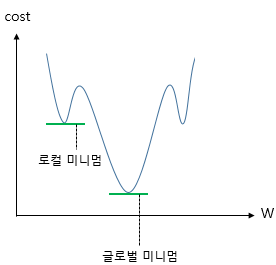

- 아다그라드(Adagrad)

    - 매개변수들은 각자 의미하는 바가 다른데, 모든 매개변수에 동일한 학습률(learning rate)을 적용하는 것은 비효율적

    - 아다그라드는 각 매개변수에 서로 다른 학습률을 적용시킴

    - 이 때, 변화가 많은 매개변수는 학습률이 작게 설정되고 변화가 적은 매개변수는 학습률을 높게 설정 

    - tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)

- 알엠에스프롭(RMSprop)

    - 아다그라드는 학습을 계속 진행한 경우에, 학습률이 지나치게 떨어진다는 단점이 있음

    - 이를 다른 수식으로 대체하여 단점을 개선

    - tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)

- 아담(Adam)

    - RMSprop과 Momentum 두 가지를 합친 듯한 방법

    - 방향과 학습률 두 가지를 모두 잡기 위한 방법

    - tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


##### 4-5. 에포크와 배치 크기와 이터레이션

- 기계는 실제값과 예측값의 오차로부터 옵티마이저를 통해서 가중치를 업데이트 함

- 에포크

    - 에포크란 인공 신경망에서 전체 데이터에 대해 순전파와 역전파가 끝난 상태를 말함

- 이터레이션 또는 스텝

    - 이터레이션이란 한 번의 에포크를 끝내기 위해서 필요한 배치의 수

### 5. 역전파(Back Propagagtion)

##### 5-1. 인공 신경망

- 예제로 사용할 인공 신경망

- Activation function은 sigmoid를 사용

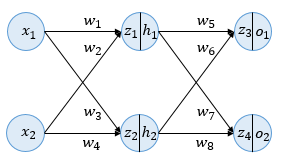

- z는 가중합을 의미, h나 o는 sigmoid를 지난 후의 각 뉴런의 출력값

- 해당 인공 신경망은 편향 b는 고려하지 않음

##### 5-2. 순전파(Forward Propagation)

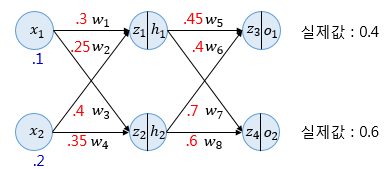

- 파란색 숫자는 input, 빨간색 숫자는 각 가중치의 값을 의미

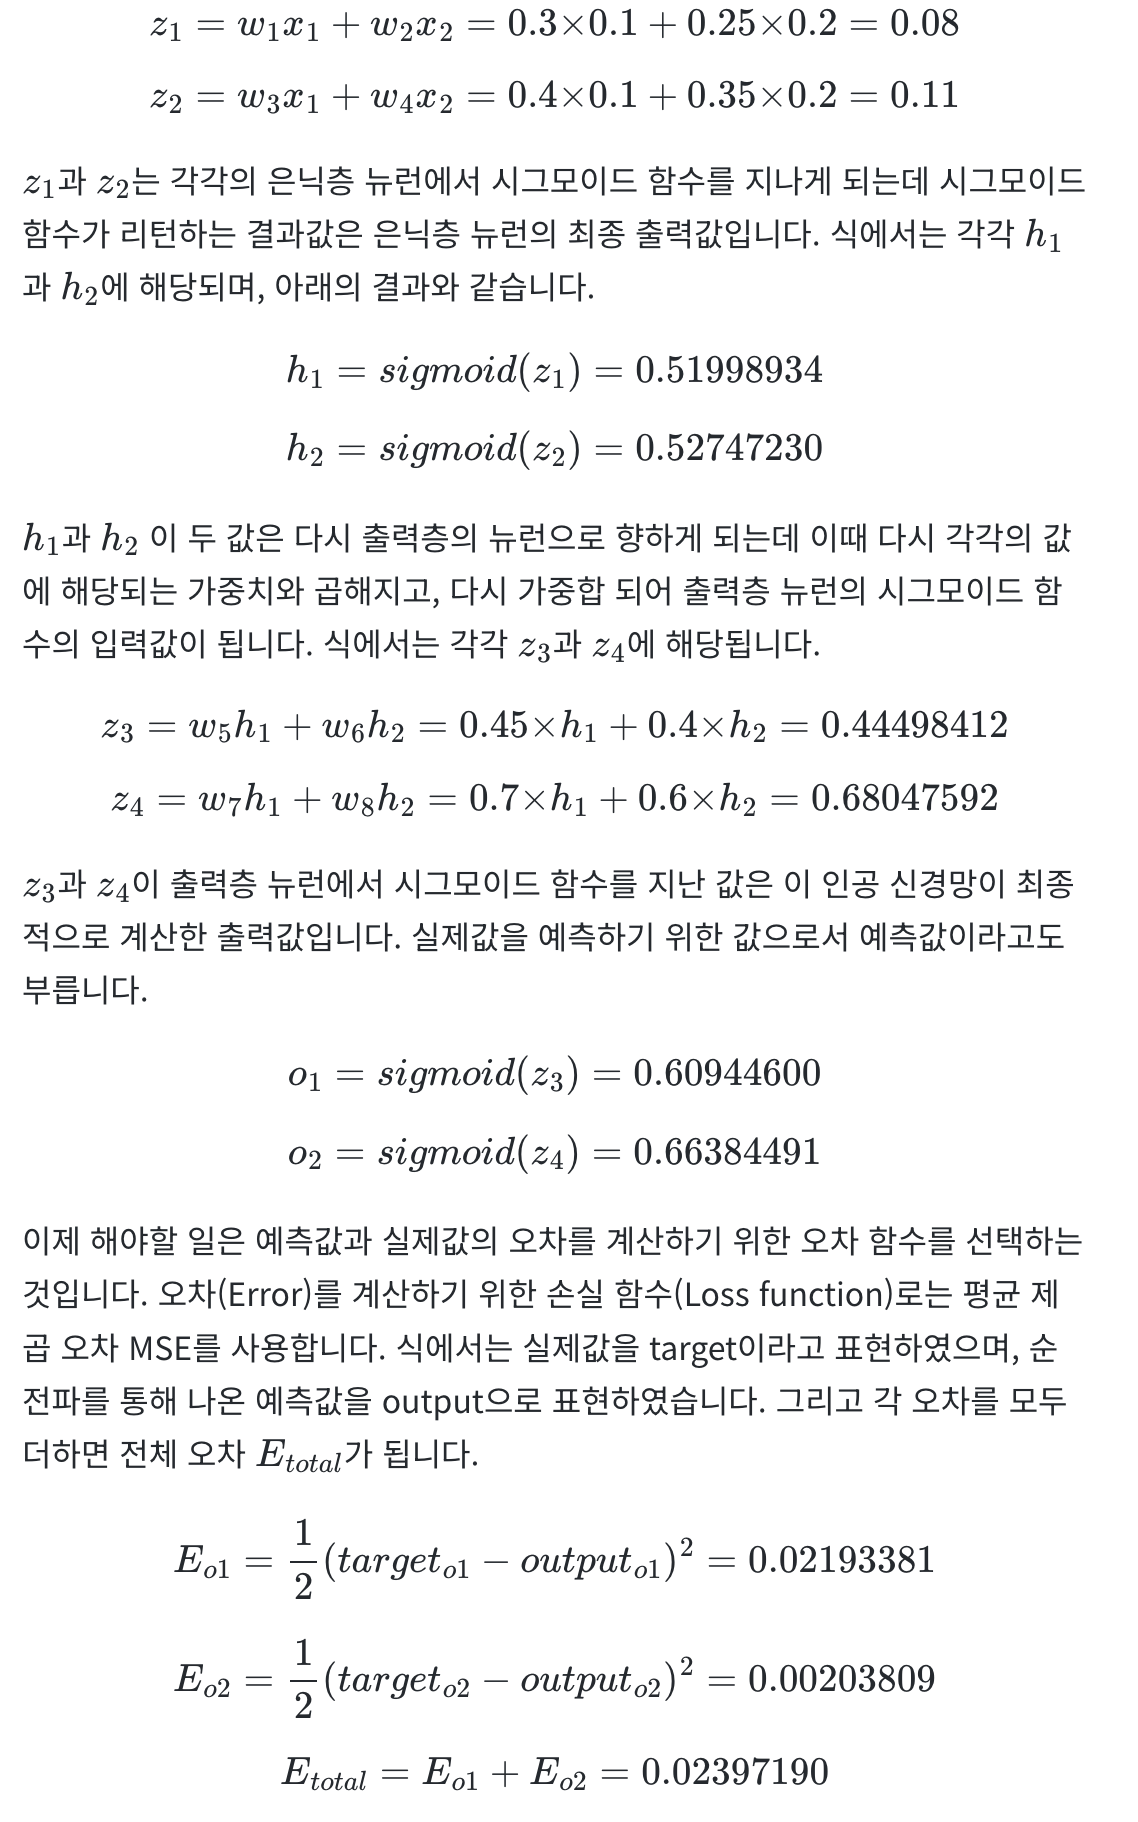

##### 5-3. 역전파 1단계 

- 순전파가 입력층에서 출력층으로 향한다면 역전파는 반대로 출력층에서 입력층 방향으로 계산하면서 가중치를 업데이트 함

- 출력층과 은닉층 사이의 가중치 업데이트를 역전파 1단계, 은닉층과 입력층 사이의 가중치 업데이트를 2단계로 가정

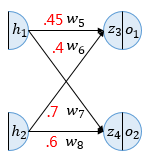

- 1단계에서 업데이트 할 가중치는 4개

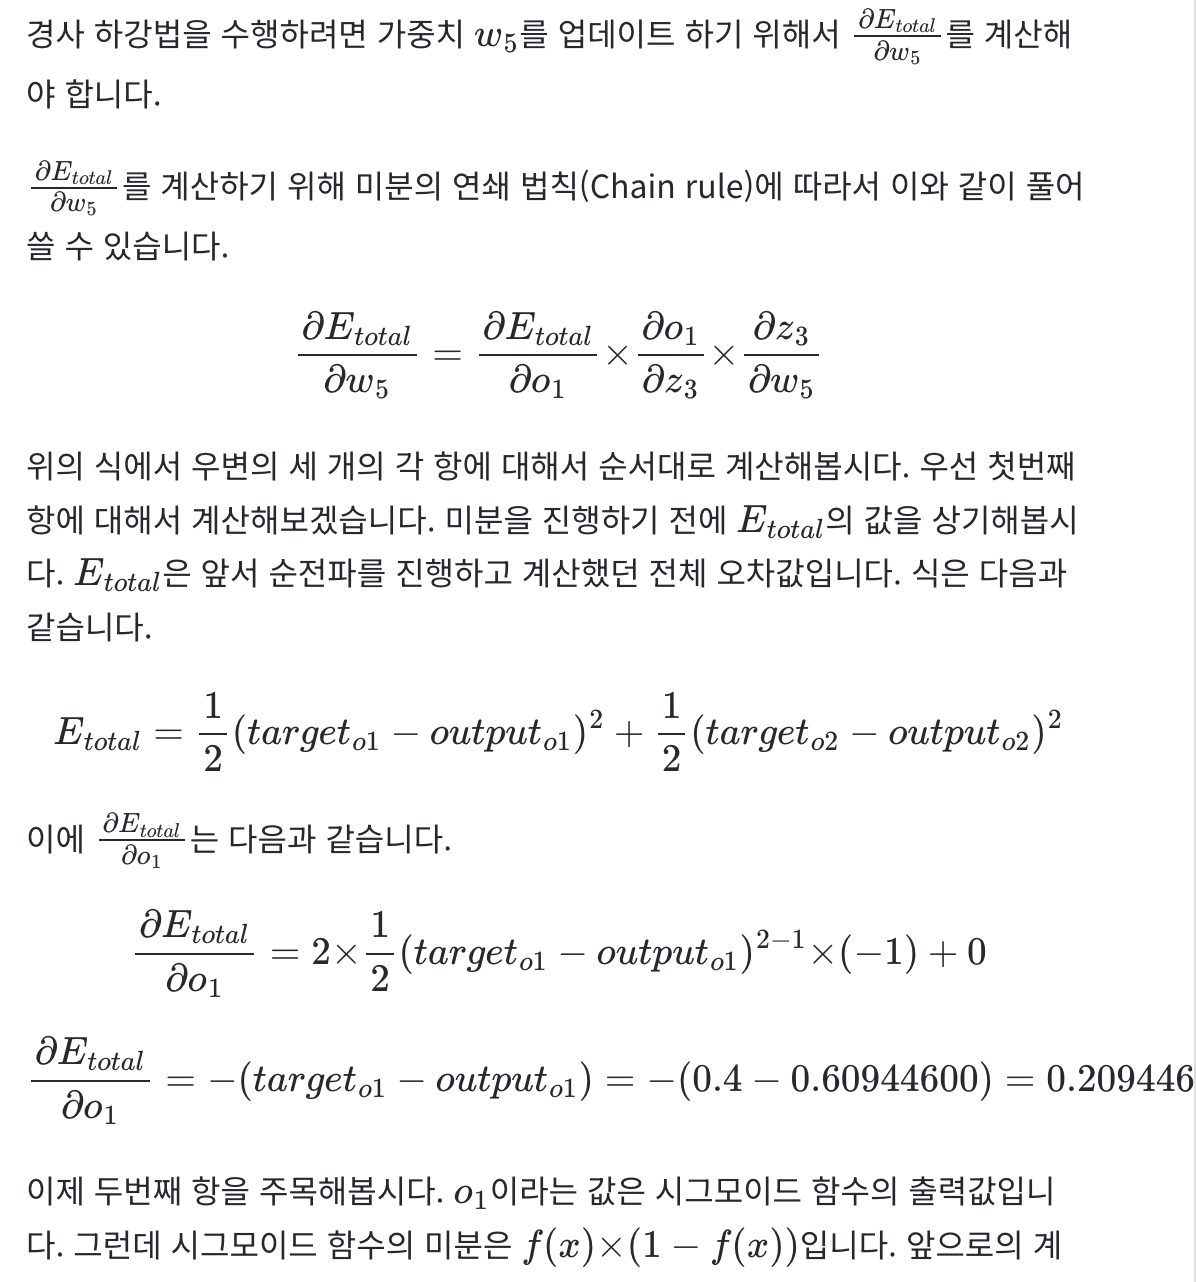

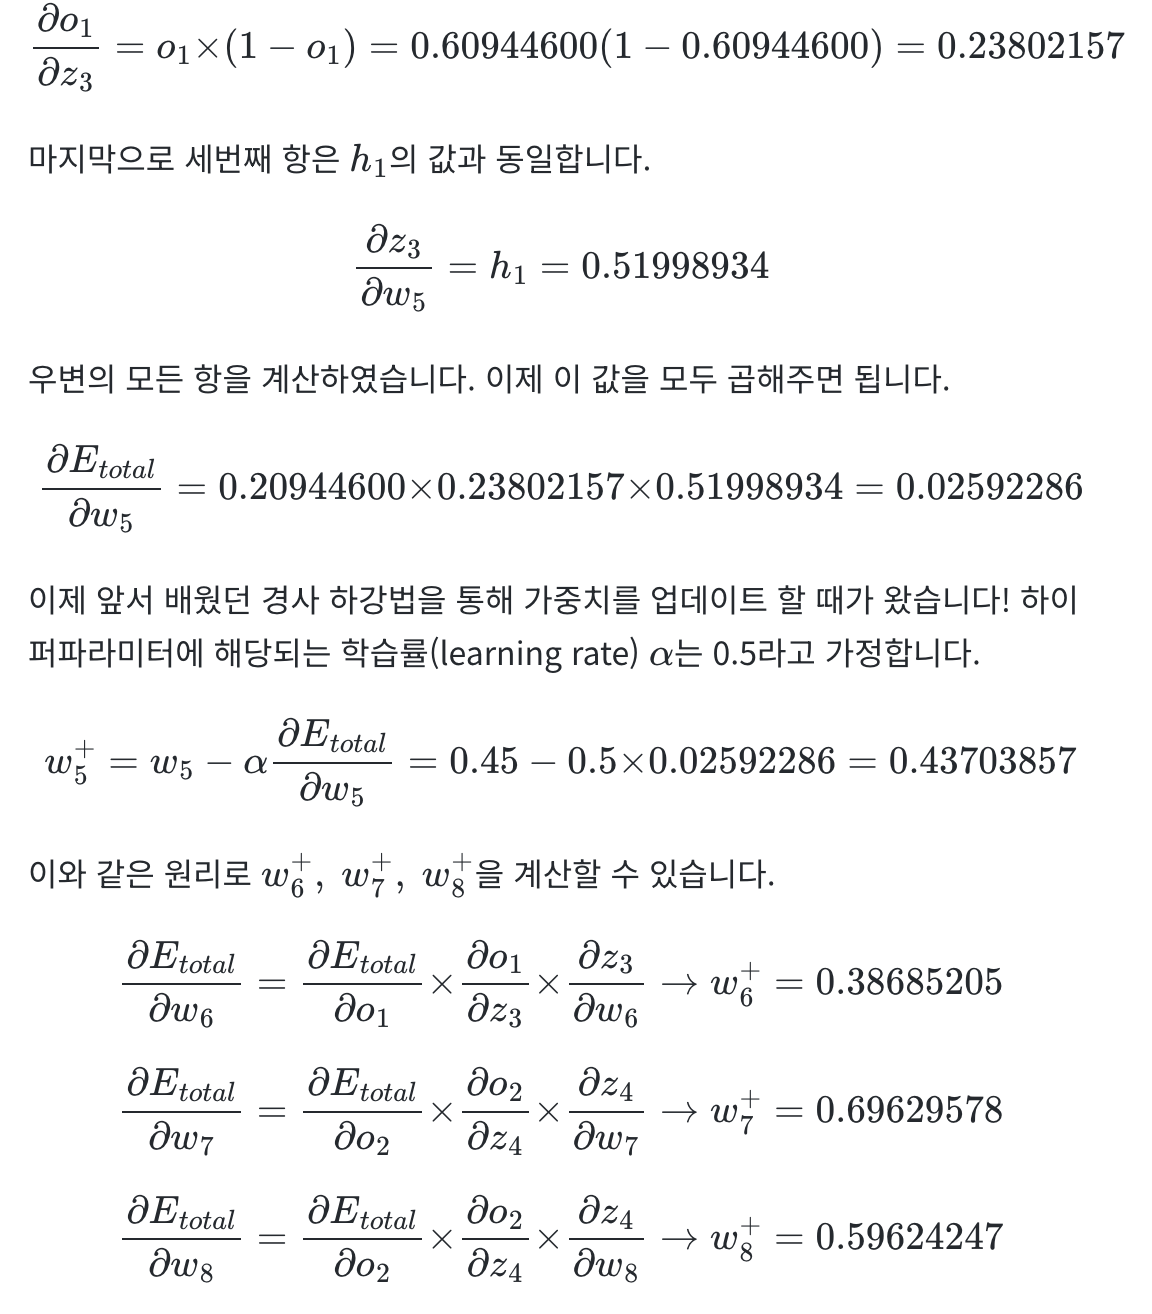

##### 5-4. 역전파 2단계

- 이전의 계산을 그대로 수행

##### 5-5. 결과 확인

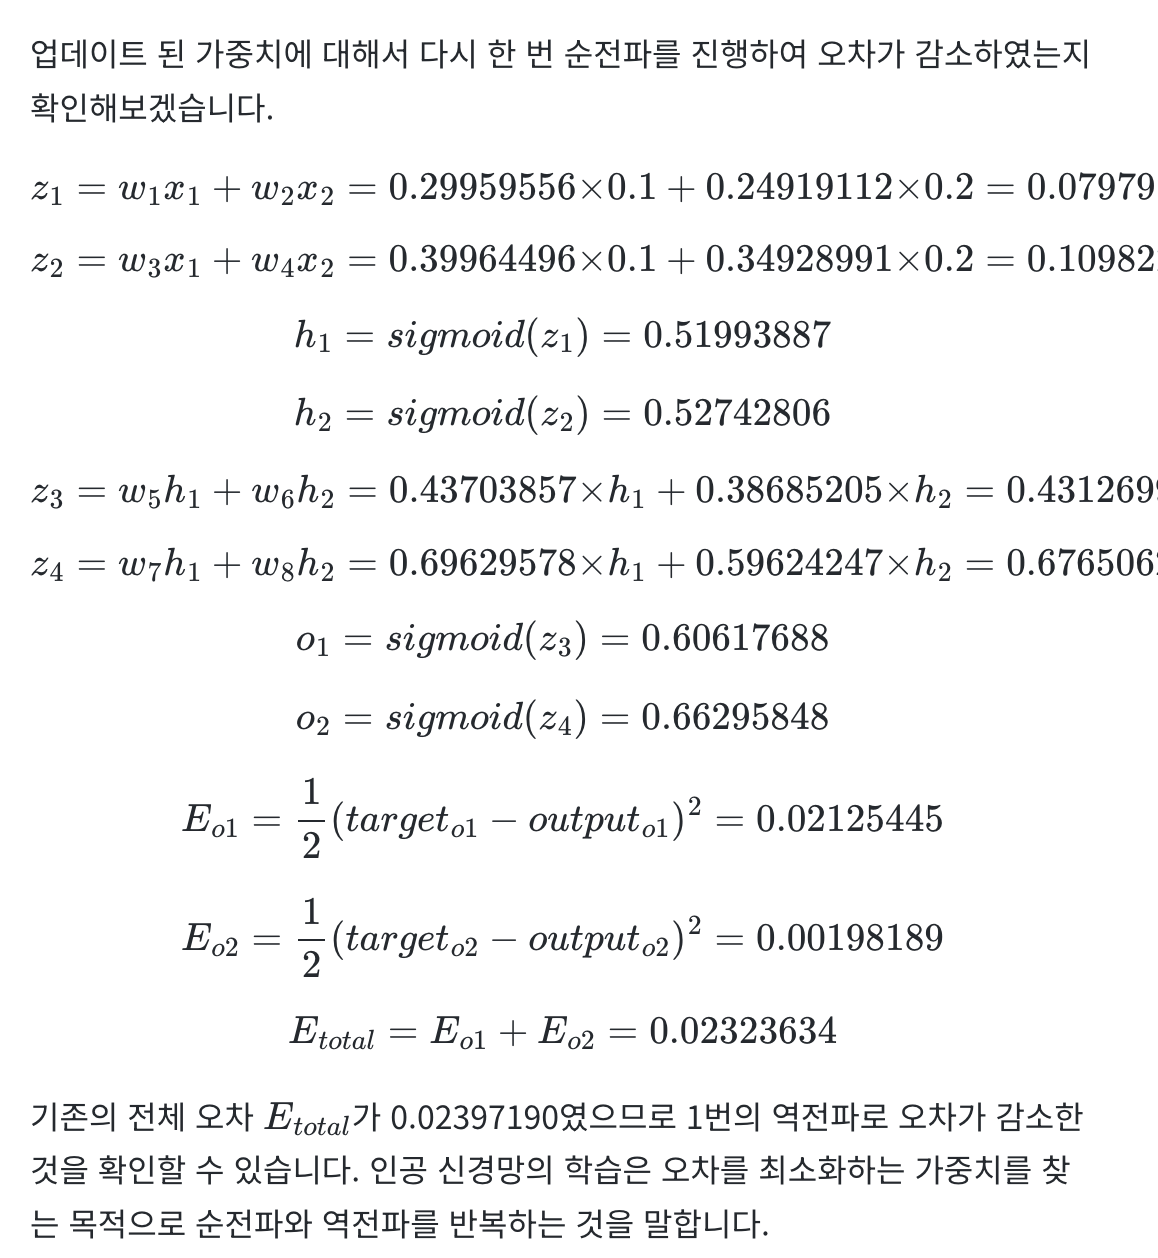

### 6. 과적합(Overfitting)을 막는 방법들

- 모델이 과적합되면 훈련 데이터에 대한 정확도는 높을지라도, 새로운 데이터에 대해서는 제대로 동작하지 않음

##### 6-1. 데이터의 양을 늘리기

- 모델은 데이터의 양이 적을 경우, 해당 데이터의 특정 패턴이나 노이즈까지 쉽게 학습하므로 과적합 발생 확률이 늘어남

##### 6-2. 모델의 복잡도 줄이기

- 인공 신경망의 복잡도는 은닉층의 수나 매개변수의 수 등으로 결정

- overfitting이 포착된다면 인공 신경망의 복잡도를 줄임으로써 방지할 수 있음

##### 6-3. 가중치 규제(Regularization) 적용

- L1 규제, L2 규제

##### 6-4. 드롭아웃(Dropout)

- 학습 과정에서 신경망의 일부를 사용하지 않는 방법

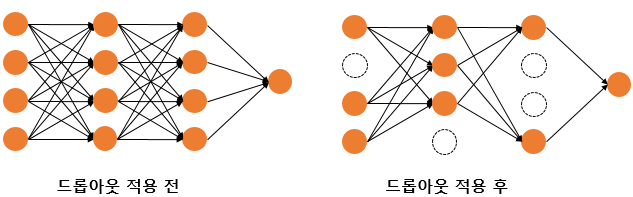

- 예를 들어 드롭아웃의 비율을 0.5로 한다면 학습 과정마다 랜덤으로 절반의 뉴런을 사용하지 않음

- 드롭아웃은 신경망 학습 시에만 사용하고 예측 시에는 사용하지 않는 것이 일반적

- 학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지

- 매번 랜덤 선택으로 뉴런들을 사용하지 않아 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합을 방지

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

max_words = 10000
num_classes = 46

model = Sequential()

model.add(Dense(256, input_shape=(max_words, ), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

### 7. 기울기 소실(Gradient Vanishing)과 폭주(Exploding)